In [1]:
# Def
import math
def convert_to_float (input_list):
    output_list_float = []
    for element in input_list:
        sublist = []
        for string in element:
            converted_float = float(string)
            sublist.append(converted_float)
        output_list_float.append(sublist)
    return output_list_float


def find_distance(input_list, test_width, test_height):
    output_distance = []
    for list in input_list:
        sublist =[]
        distance = math.sqrt((list[0] - test_width)**2 + (list[1] - test_height)**2)
        sublist.append(distance)
        sublist.append(list[2])
        output_distance.append(sublist)
    output_distance.sort()
    return output_distance


def output(distance):
    if distance[0][1] == 0:
        print(f"Sample with (width, height): ({test_width[0]}, {test_height[0]}) classified as Pichu")
    else:
        print(f"Sample with (width, height): ({test_width[0]}, {test_height[0]}) classified as Pikachu")


In [2]:
# Clean data in datapoints.

with open ("datapoints.txt","r") as f_read:
    
    datapoints_list_step_01 = [data.strip("\n").replace(",","") for data in f_read.readlines() if data[0].isdigit()]
    datapoints_list_step_02 = [data.split() for data in datapoints_list_step_01]

In [3]:
# Convert String to Float.

datapoints_list_float = convert_to_float(datapoints_list_step_02)

In [4]:
# Sorted lists.

pichus_list, pikachus_list = [], []
for element in datapoints_list_float:
    if element[2] == 0.0:
        pichus_list.append(element)
    else:
        pikachus_list.append(element)

In [5]:
# Width and Height.

pichus_width, pichus_height = [], []
for element in pichus_list:
    pichus_width.append(element[0])
    pichus_height.append(element[1])

pikachus_width, pikachus_height = [], []
for element in pikachus_list:
    pikachus_width.append(element[0])
    pikachus_height.append(element[1])

In [6]:
# Testpoints.
with open ("testpoints.txt","r") as f_read:
    
   testpoints_list_step_01 = [data.strip("\n").replace(",","").replace("(","").replace(")","") for data in f_read.readlines() if data[0].isdigit()]
   testpoints_list_step_02 = [data.split()[1:] for data in testpoints_list_step_01]
testpoints_list_step_02


testpoints_list_float = convert_to_float(testpoints_list_step_02)


test_width, test_height = [], []
for element in testpoints_list_float:
    test_width.append(element[0])
    test_height.append(element[1])

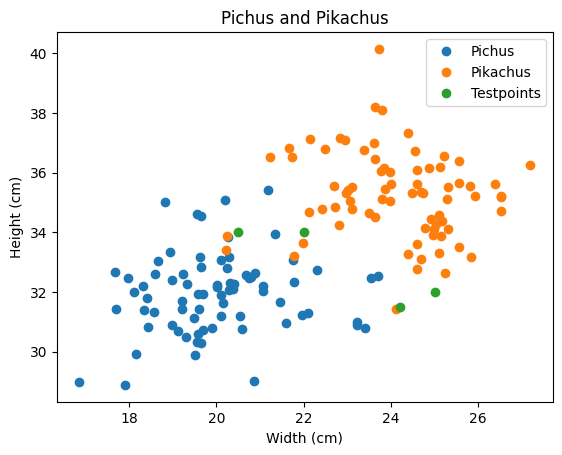

In [7]:
# Plot.

import matplotlib.pyplot as plt

x1, y1 = pichus_width, pichus_height
x2, y2 = pikachus_width, pikachus_height

x3, y3 = test_width, test_height

plt.plot(x1,y1,'o')
plt.plot(x2,y2,'o')
plt.plot(x3,y3,'o')
plt.title("Pichus and Pikachus")
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.legend(["Pichus", "Pikachus", "Testpoints"])

plt.show()

In [8]:
# Distance.

import math



distance_01 = find_distance(datapoints_list_float, test_width[0], test_height[0])
distance_02 = find_distance(datapoints_list_float, test_width[1], test_height[1])
distance_03 = find_distance(datapoints_list_float, test_width[2], test_height[2])
distance_04 = find_distance(datapoints_list_float, test_width[3], test_height[3])

In [9]:
# Output.

output(distance_01)
output(distance_02)
output(distance_03)
output(distance_04)


Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (25.0, 32.0) classified as Pichu


In [10]:
 # User.

while True:
    
    try:
      test_width_user = float(input("Input width of a testpoint: "))
      if test_width_user < 0:
         raise ValueError ("The values of the points cannot be negative.")
      test_height_user = float(input("Input height of a testpoint: "))
      if test_height_user < 0:
         raise ValueError ("The values of the points cannot be negative.")

      break                                                                      # breaks out of while loop if nothing went wrong
    except ValueError as err_01:
      print(err_01)


testpoints_user_list = []
testpoints_user_list.append(test_width_user)
testpoints_user_list.append(test_height_user)

distance_user = find_distance(datapoints_list_float, test_width_user, test_height_user)

In [11]:
# Ten nearest points.

distance_10_nearest = distance_user[:10]

count_pichu = 0
count_pikachu = 0

for list in distance_10_nearest:
    if list[1] == 0.0:
        count_pichu += 1
    else:
        count_pikachu += 1


if count_pichu > count_pikachu:
    print(f"Sample with (width, height): ({test_width_user}, {test_height_user}) classified as Pichu")
else:
    print(f"Sample with (width, height): ({test_width_user}, {test_height_user}) classified as Pikachu")


Sample with (width, height): (1.0, 2.0) classified as Pichu


In [12]:
# Bonus. The original data random.

import random as rng


with open ("datapoints.txt","r") as f_read:
    
    datapoints_list_step_01 = [data.strip("\n").replace(",","") for data in f_read.readlines() if data[0].isdigit()]
    data_list = [data.split() for data in datapoints_list_step_01]


# Converts String to Float.

data_list_float = convert_to_float(data_list)


# Randomises data. Creates lists.
Count = 0
accuracy_list = []
while Count<=9:
    rng.shuffle(data_list_float)
    pichu_random, pikachu_random = [], []
    pichu_train, pikachu_train, pichu_test, pikachu_test = [], [], [], []
    for element in data_list_float:
        if element[2] == 0.0:
            pichu_random.append(element)
            pichu_train = pichu_random[:50] 
            pichu_test = pichu_random[50:]
        else:
            pikachu_random.append(element)
            pikachu_train = pikachu_random[:50]
            pikachu_test = pikachu_random[50:]

    pokemon_träningsdata = pichu_train + pikachu_train

# Width and Height.

    pichu_test_width, pichu_test_height = [], []

    for element in pichu_test:
        pichu_test_width.append(element[0])
        pichu_test_height.append(element[1])

    pikachu_test_width, pikachu_test_height = [], []
    for element in pikachus_list:
        pikachu_test_width.append(element[0])
        pikachu_test_height.append(element[1])


# Distance Pikachu.

    count_pk = 0
    TP = 0
    FP = 0
    while count_pk <=24:
        distance_pikachu_test = find_distance(pokemon_träningsdata,pikachu_test_width[count_pk],pikachu_test_height[count_pk])
        if distance_pikachu_test[0][1] == 1.0:
            TP+=1
        else:
            FP+=1
        count_pk+=1
    


# Distance Pichu.

    count_pi = 0
    FN = 0
    TN = 0
    while count_pi <=24:
        distance_pichu_test = find_distance(pokemon_träningsdata,pichu_test_width[count_pi],pichu_test_height[count_pi])
        if distance_pichu_test[0][1] == 0.0:
            TN+=1
        else:
            FN+=1
        count_pi+=1

    accuracy = (TP+TN)/(TP+TN+FP+FN)
    accuracy_list.append(accuracy)
    Count+= 1

print(accuracy_list)

average_accuracy = sum(accuracy_list)/len(accuracy_list)
print (f"The average accuracy is {average_accuracy}")


[0.94, 0.98, 0.96, 1.0, 0.96, 0.98, 0.98, 0.94, 0.96, 0.96]
The average accuracy is 0.966


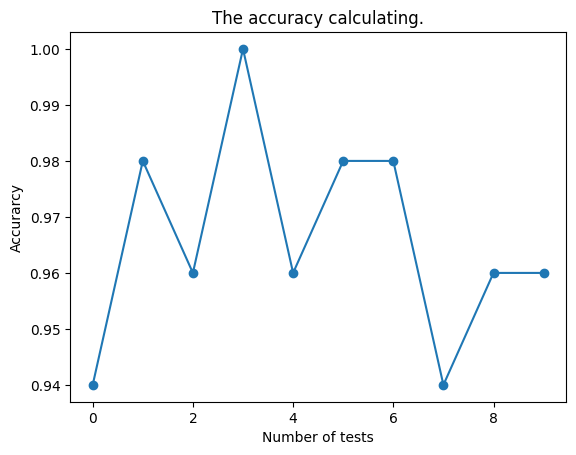

In [13]:
# Plott

plt.plot(accuracy_list, '-o')
plt.title("The accuracy calculating.")
plt.xlabel("Number of tests")
plt.ylabel("Accurarcy")

plt.show()